# My Youtube Watch History : Analysis
<i> Mélanie Picot (2024) <i>

This notebook aims to analyse the data issued from my watch history and the youtube API. The data cleaning and formattiong was done in the previous notebook. 

Analysis of the videos history :
Genre and number : What genre of content did I watch? What my favorite? 
Time : How much time did I stayed in front of youtube? Did I watched a lot of youtube-shorts? At what hour of the day? More on the weekend? (Timeframe?)

Analysis of the videos statistique : 
from statistics published by Youtube : big disparity in the content published, with an enormous number of videos with 0 views (source?) What does the algorithm proposed to me : Can we see the disparity? classed more by views?Like?Comments? Is there some links between those ?

Analysis of the channel of my favorite youtubers  : 
Already like by others? Analysis views and subscriber. 



## Datas importation

In [131]:
import pandas as pd
import numpy as np
import openpyxl 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta
import scipy.stats as stats

In [133]:
xls = pd.ExcelFile('youtube_data.xlsx')
df_channel = pd.read_excel(xls, 'channel_data')
df_video = pd.read_excel(xls, 'video_data_complete')

In [135]:
df_video.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           68206 non-null  object        
 1   Published_date  68206 non-null  datetime64[ns]
 2   Views           68206 non-null  int64         
 3   Like            68206 non-null  int64         
 4   Comments        68206 non-null  int64         
 5   Videocategory   68206 non-null  object        
 6   titleUrl        68206 non-null  object        
 7   time            68206 non-null  datetime64[ns]
 8   video_ID        68206 non-null  object        
 9   creator         68206 non-null  object        
 10  channel_url     68206 non-null  object        
 11  channel_id      68206 non-null  object        
 12  year            68206 non-null  int64         
 13  duration        68206 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(4), object(7)


## Analysis DataFrame video 

### Video History : How many videos and what genre ?

#### Number of videos

##### Total Number

In [137]:
nbTotVideo = len(df_video)
nbTotVideo

68206

##### Graph - Number of videos/year

In [139]:
#df_video = df_video[df_video['duration'].notnull()]
nbVideoYear = df_video.groupby('year').size()
nbVideoYear

year
2018     9045
2019      793
2020     1048
2021     6097
2022    23105
2023    28118
dtype: int64

C:\Users\melan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


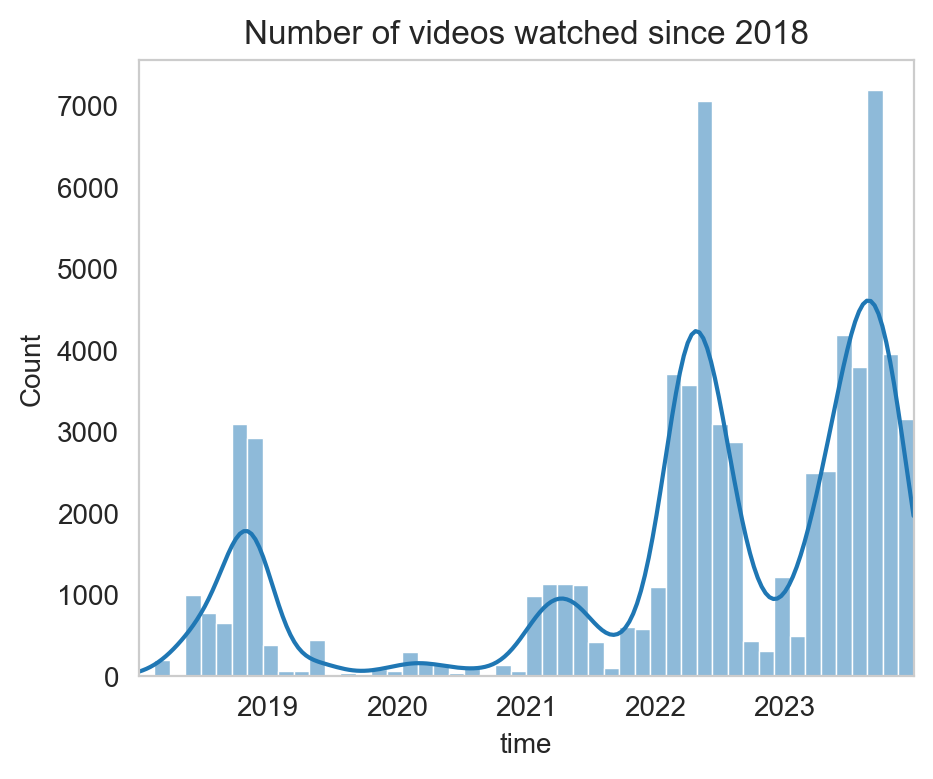

In [141]:
fig = plt.figure(figsize=(5,4),dpi=200)
sns.histplot(data=df_video,x='time',kde=True,bins=50)
plt.title('Number of videos watched since 2018')
plt.xlim(df_video['time'].min(),df_video['time'].max())

sns.set_style("whitegrid", {'axes.grid' : False})

fig.savefig('Nb_video_1823.png')

#### Genre of Videos

##### Exploration

In [143]:
nbVideoCat = pd.DataFrame({'counts' : df_video.groupby('Videocategory').size().sort_values(ascending=False)})
nbVideoCat['per'] = (nbVideoCat['counts']/nbTotVideo)*100
nbVideoCat

,counts,per
Videocategory,,
Music,43450,63.704073
People&Blog,10091,14.794886
Entertainment,6282,9.210333
Film&Animation,3380,4.955576
Comedy,1411,2.068733
Gaming,1033,1.514530
Education,883,1.294608
HowTo&Style,493,0.722810
Science&Technology,423,0.620180


In [145]:
my_new_group_categories = {'Music':'Music','People&Blog':'People&Blog','Entertainment':'Entertainment','Film&Animation':'Film&Animation','Comedy':'Comedy',
                           'Gaming':'Gaming','Education':'Education','HowTo&Style':'Others','Science&Technology':'Others', 'News&Politics':'Others', 'Sports':'Others',
                           'Travel&Events':'Others', 'Pets&Animal':'Others', 'Autos':'Others', 'NonProfits&Activism':'Others', 'Trailers':'Others'}

In [147]:
df_video['group_category'] = df_video['Videocategory'].map(my_new_group_categories)

In [149]:
per_nbVideo_NewCat = (df_video['group_category'].value_counts()/nbTotVideo)*100
per_nbVideo_NewCat.sort_values(ascending=False)

group_category
Music             63.704073
People&Blog       14.794886
Entertainment      9.210333
Film&Animation     4.955576
Others             2.457262
Comedy             2.068733
Gaming             1.514530
Education          1.294608
Name: count, dtype: float64

##### Graph - videos categories since 2018

C:\Users\melan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


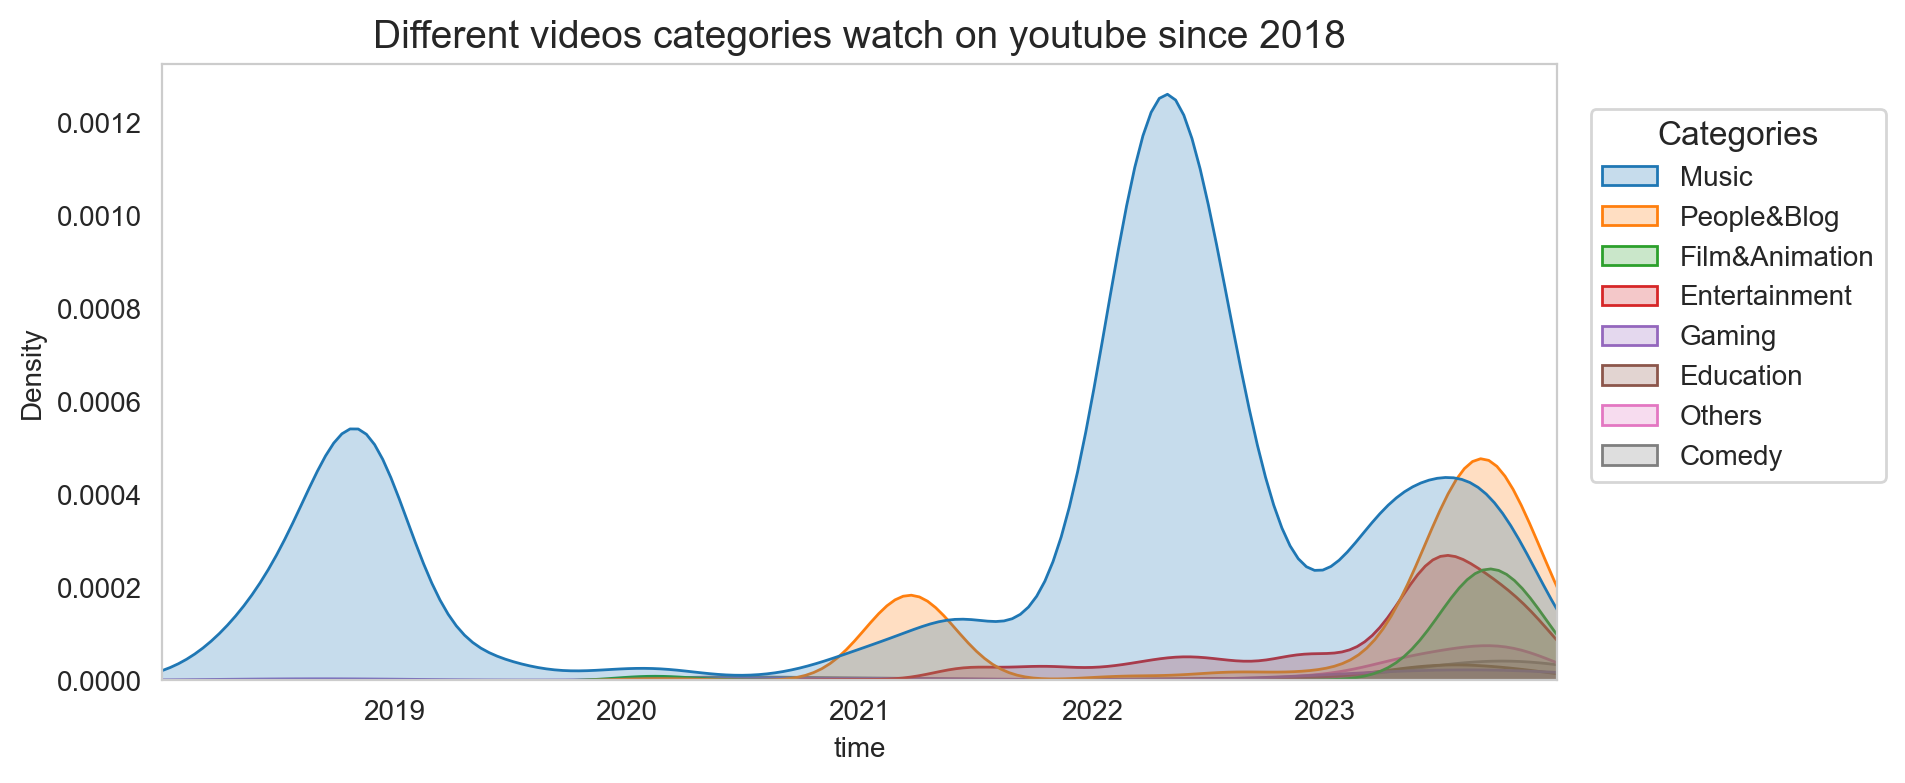

In [172]:
fig= plt.figure(figsize=(9,4),dpi=200)

ax = sns.kdeplot(data=df_video, x='time',hue='group_category',fill=True)

plt.xlim(df_video['time'].min(),df_video['time'].max())
sns.move_legend(ax, "lower center", bbox_to_anchor=(1.13, 0.3), title_fontsize=12,title='Categories')
plt.title('Different videos categories watch on youtube since 2018',fontsize=14)

fig.savefig('VidCat_1823.png',bbox_inches='tight')
plt.show()

##### Graph - zoom 2023 - Diversification of taste

In [175]:
cat_2023 = df_video[df_video.year == 2023]['group_category'].value_counts().sort_values(ascending=False)[:5]
df_2023_cat = pd.DataFrame({'per_cat' : cat_2023/nbVideoYear[2023]*100}).reset_index()
df_2023_cat

,group_category,per_cat
0,Music,32.836617
1,People&Blog,26.132726
2,Entertainment,15.865282
3,Film&Animation,11.419731
4,Others,5.174621


In [177]:
cat_2022 = df_video[df_video.year == 2022]['group_category'].value_counts().sort_values(ascending=False)[:5]
df_2022_cat = pd.DataFrame({'per_cat' :cat_2022/nbVideoYear[2022]*100}).reset_index()
df_2022_cat

,group_category,per_cat
0,Music,91.400130
1,Entertainment,5.094135
2,People&Blog,1.774508
3,Others,0.588617
4,Education,0.549665


In [179]:
order_list = ['Music', 'People&Blog', 'Entertainment','Film&Animation','Others','Education']

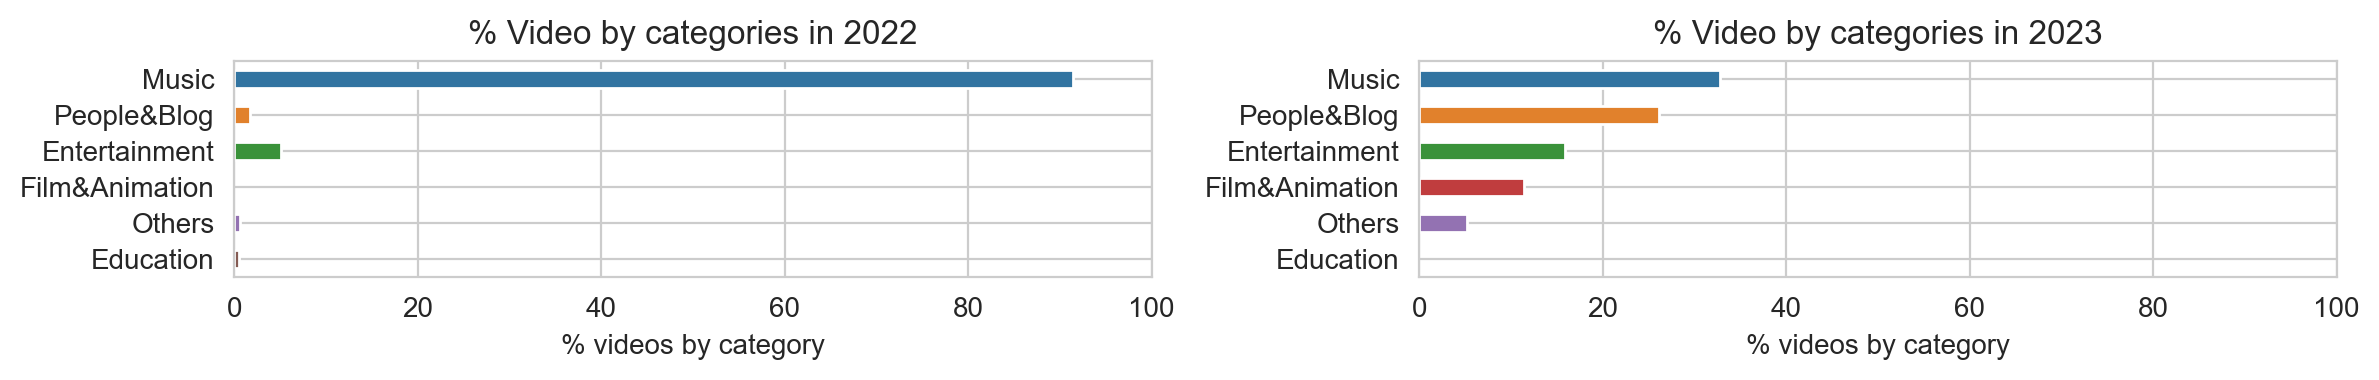

In [191]:
fig, axes = plt.subplots(1, 2,figsize=(12,2),dpi=200)
sns.barplot(data=df_2022_cat,x="per_cat",y="group_category",ax=axes[0],width=0.5,order=order_list)
sns.barplot(data=df_2023_cat,x="per_cat",y="group_category",ax=axes[1],width=0.5,order=order_list)

axes[0].set_title('% Video by categories in 2022')
axes[1].set_title('% Video by categories in 2023')

for ax in axes.flat:
    ax.set(xlabel='% videos by category', ylabel='')
    ax.set_xlim(0,100)    
    ax.grid("whitegrid")
    
plt.tight_layout()

fig.savefig("per_videocat_22et23.png",bbox_inches='tight')



### Video History : How much time spend on youtube?

#### Exploration

In [196]:
TotWatchTime = df_video['duration'].sum()
TotWatchTimeHour = np.round(TotWatchTime /60,1)
TotWatchTimeDay = np.round(TotWatchTimeHour /24,1)

print(f'WatchTime in min : {TotWatchTime}')
print(f'WatchTime in hours : {TotWatchTimeHour}')
print(f'WatchTime in days : {TotWatchTimeDay}')

WatchTime in min : 356113.53
WatchTime in hours : 5935.2
WatchTime in days : 247.3


In [198]:
WatchTimeYear = df_video.groupby('year')['duration'].agg(['sum','mean'])
WatchTimeYear

,sum,mean
year,,
2018,31937.61,3.530968
2019,3072.57,3.874615
2020,7407.52,7.068244
2021,64640.21,10.601970
2022,107886.81,4.669414
2023,141168.81,5.020585


In [194]:
141168/60/24

98.03333333333335

#### Categorization of video lenght

In [200]:
df_video.loc[df_video.duration <=0.59, 'lenght_video'] = 'yt-shorts'
df_video.loc[(df_video.duration >0.59)&(df_video.duration<=4), 'lenght_video'] = '1 to 4min videos'
df_video.loc[(df_video.duration >4)&(df_video.duration<=20), 'lenght_video'] = '4 to 20 min videos'
df_video.loc[(df_video.duration >20)&(df_video.duration<=45), 'lenght_video'] = '20 to 45 min videos'
df_video.loc[df_video.duration > 45, 'lenght_video'] = 'over 45min videos'

In [202]:
df_video['lenght_video'].value_counts()

lenght_video
1 to 4min videos       41005
yt-shorts              12114
4 to 20 min videos     11672
20 to 45 min videos     2349
over 45min videos       1066
Name: count, dtype: int64

##### Graph - Lenght Video since 2018

C:\Users\melan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


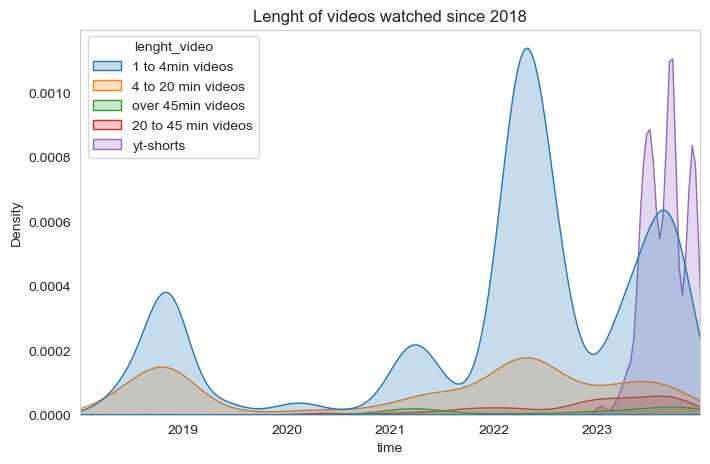

In [210]:
fig,ax = plt.subplots(figsize=(8,5),dpi=100)
ax = sns.kdeplot(data=df_video,x='time',hue='lenght_video',fill=True)

plt.title('Lenght of videos watched since 2018')
plt.xlim(df_video['time'].min(),df_video['time'].max())

sns.move_legend(ax, "lower center", bbox_to_anchor=(0.15, 0.65))

fig.savefig('lenghtvideo.png',bbox_inches='tight')

##### % lenght video since 2018

In [256]:
per_shorts = 100*11734/len(df_video)
print(f'shorts = {np.round(per_shorts,1)}%')
per_svideo = 100*40997/len(df_video)
print(f's-video = {np.round(per_svideo,1)}%')
per_mvideo = 100*11585/len(df_video)
print(f'm-video = {np.round(per_mvideo,1)}%')
per_lvideo = 100*2152/len(df_video)
print(f'l-video = {np.round(per_lvideo,1)}%')
per_xlvideo = 100*924/len(df_video)
print(f'xl-video = {np.round(per_xlvideo,1)}%')

shorts = 17.2%
s-video = 60.1%
m-video = 17.0%
l-video = 3.2%
xl-video = 1.4%


### Video History : What are these videos during 1 to 4min?

In [258]:
short_video = df_video[(df_video['duration']>0.59)&(df_video['duration']<=4)]

In [260]:
short_video['Videocategory'].value_counts()[:5]

Videocategory
Music             33669
People&Blog        3557
Film&Animation     2899
Entertainment       562
Gaming              166
Name: count, dtype: int64

In [262]:
new = short_video[short_video['Videocategory'].isin(['Music','People&Blog','Film&Animation','Entertainment','Gaming'])].copy()

C:\Users\melan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


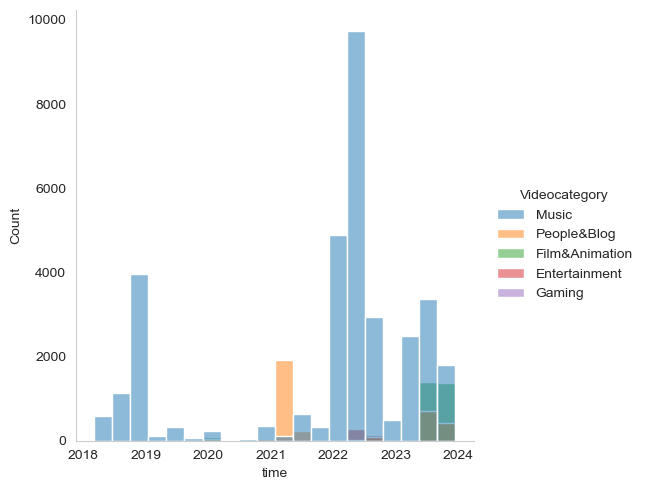

In [266]:
sns.displot(data=new,x='time',hue='Videocategory',bins=20)

In [268]:
short_video['Videocategory'].value_counts()[:1]

Videocategory
Music    33669
Name: count, dtype: int64

In [270]:
len(short_video['Videocategory'])

41005

In [272]:
per_music = np.round(100*33669/len(short_video['Videocategory']),1)
print(f'{per_music}% of this videos(1min-4min) are music videos')

82.1% of this videos(1min-4min) are music videos


### Video History : Which hour did I watched video?

In [353]:
df_video['hour'] = df_video['time'].dt.hour

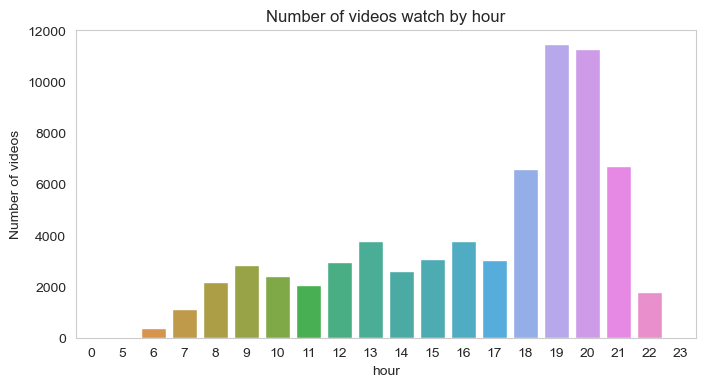

In [355]:
fig,ax = plt.subplots(figsize=(8,4))
ax = sns.countplot(data=df_video,x='hour')

ax.set_xlabel('hour')
ax.set_ylabel('Number of videos')
ax.set_title('Number of videos watch by hour')

fig.savefig('hourwatchtime.png')

In [387]:
hours=[18,19,20,21,22]
total=[]
for i in hours : 
    video = np.round(len(df_video[df_video['hour'] == i])/nbTotVideo*100,1)
    print(f'{i}h : {video}%')
    total.append(video)
    
print(f'total : {np.round(sum(total),1)}%')


18h : 9.7%
19h : 16.8%
20h : 16.5%
21h : 9.8%
22h : 2.6%
total : 55.4%


In [389]:
df_video[df_video['time'].dt.hour == 19]['Videocategory'].value_counts()[:3]

Videocategory
Music            7999
People&Blog      1694
Entertainment     874
Name: count, dtype: int64

In [321]:
df_video[df_video['time'].dt.hour == 20]['Videocategory'].value_counts()[:3]

Videocategory
Music            8002
People&Blog      1414
Entertainment    1132
Name: count, dtype: int64

In [323]:
df_video[df_video['time'].dt.hour == 13]['Videocategory'].value_counts()[:3]

Videocategory
Music             2273
Film&Animation     441
People&Blog        402
Name: count, dtype: int64

## Videos statistique

In [395]:
df_video.Views.describe()

count    6.820600e+04
mean     1.623370e+08
std      4.658526e+08
min      9.000000e+00
25%      1.052390e+06
50%      9.506015e+06
75%      4.734045e+07
max      6.263949e+09
Name: Views, dtype: float64

C:\Users\melan\anaconda3\Lib\site-packages\seaborn\distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\melan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Views'>

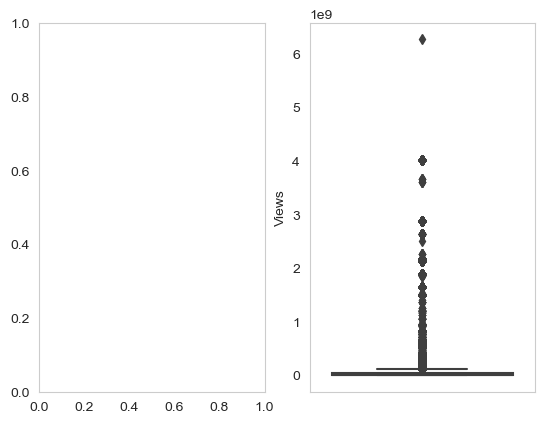

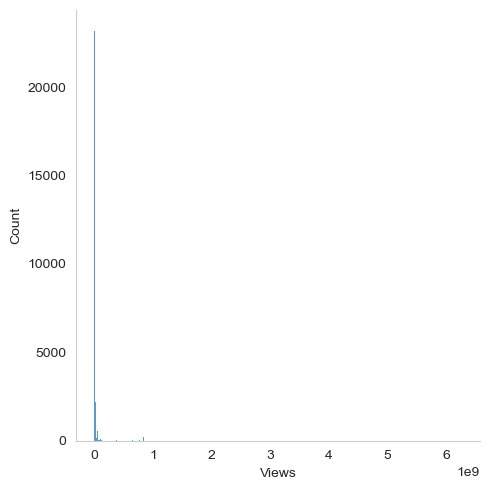

In [447]:
fig,axes = plt.subplots(1,2)
sns.displot(data=df_video,x='Views',ax=axes[0])
sns.boxplot(data=df_video,y='Views',ax=axes[1])

<Axes: ylabel='Views'>

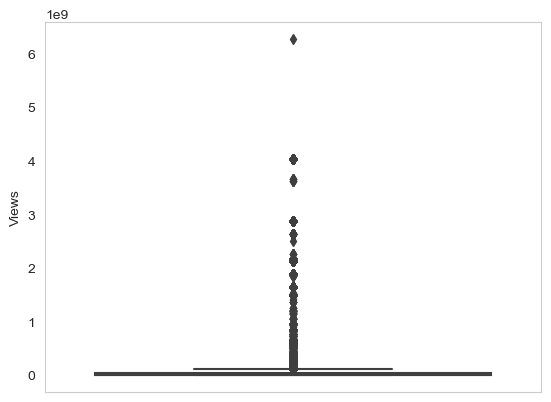

In [380]:
df_video[['Views','Like','Comments']].corr()

,Views,Like,Comments
Views,1.000000,0.944251,0.910663
Like,0.944251,1.000000,0.910521
Comments,0.910663,0.910521,1.000000


<Axes: xlabel='Views', ylabel='Like'>

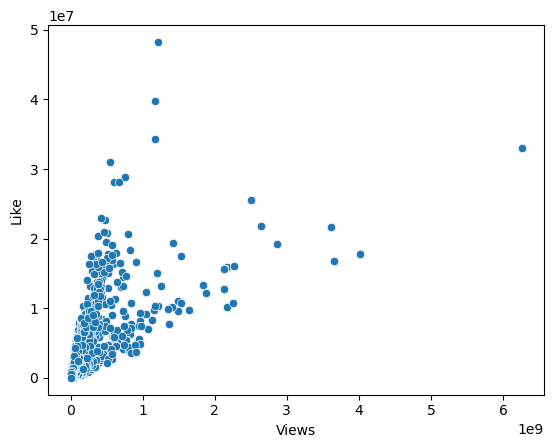

In [382]:
sns.scatterplot(data=df_video,x='Views',y='Like')

<Axes: xlabel='Views', ylabel='Comments'>

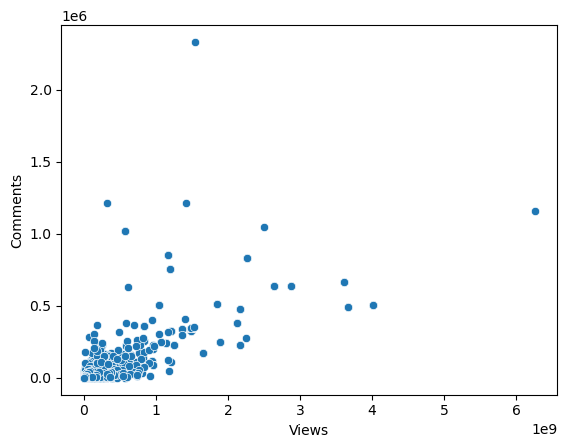

In [384]:
sns.scatterplot(data=df_video,x='Views',y='Comments')

<Axes: xlabel='Like', ylabel='Comments'>

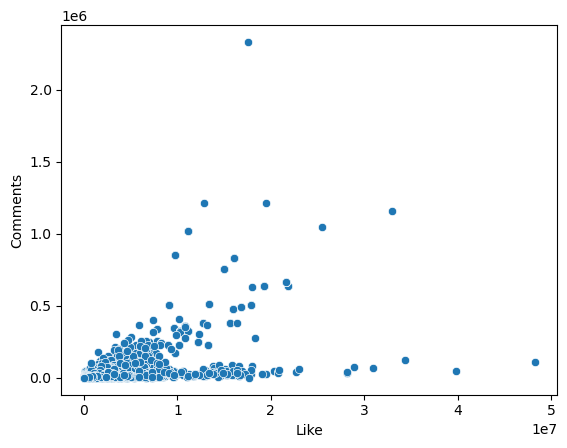

In [386]:
sns.scatterplot(data=df_video,x='Like',y='Comments')

# Channels stat

In [ ]:
df_channel

In [388]:
df_channel.sort_values('count',ascending=False)[['Channel_name','count']].iloc[0:5]

,Channel_name,count
0,CloudKid,1432
1,ImagineDragonsVEVO,401
2,Adam Jensen,330
3,McSkyz,234
4,twenty one pilots,193


In [390]:
df_channel['per_viewvid'] = 100*(df_channel['count'] / df_channel['Total_videos'])
df_channel['per_viewvid'].describe()

count    312.000000
mean      25.518739
std       57.723929
min        0.074583
25%        3.622590
50%        8.612867
75%       21.079545
max      503.846154
Name: per_viewvid, dtype: float64

In [392]:
df_channel.sort_values('per_viewvid',ascending=True).iloc[0:5]

,Channel_name,channel_id,Channel_date,Subscribers,Views,country,Total_videos,count,per_viewvid
234,Law&Crime Network,UCz8K1occVvDTYDfFo7N5EZw,2015-08-28 17:26:16,5850000,3813526146,US,18771,14,0.074583
213,Le Parisien,UCfHn_8-ehdem86fEvlFg-Gw,2014-10-06 16:42:09,1490000,2111489642,FR,15747,16,0.101607
77,France Inter,UCJldRgT_D7Am-ErRHQZ90uw,2011-09-19 09:03:53,1160000,1767618656,FR,37350,43,0.115127
172,FilmsActu,UC_i8X3p8oZNaik8X513Zn1Q,2009-10-16 09:05:21,4590000,3290567574,FR,11821,20,0.169190
257,TF1 INFO,UCsrPUA0ZSDCNZC6wyRlR7ZA,2022-01-07 12:45:36,737000,447148073,FR,4736,13,0.274493


In [394]:
df_channel['Channel_date'].dt.year.describe()


count     312.000000
mean     2015.419872
std         4.658083
min      2005.000000
25%      2012.000000
50%      2015.000000
75%      2020.000000
max      2023.000000
Name: Channel_date, dtype: float64

In [396]:
df_country = pd.DataFrame(df_channel['country'].value_counts())
df_country = df_country.reset_index()

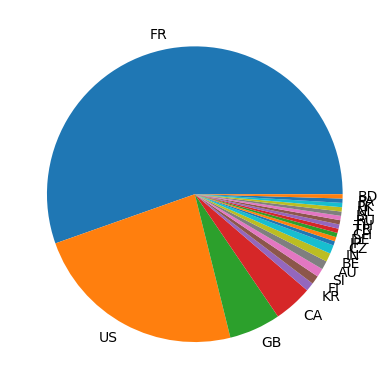

In [398]:
plt.pie(df_country['count'],labels=df_country['country'])
plt.show()

In [400]:
df_channel[['Subscribers','Views','Total_videos']].corr()

,Subscribers,Views,Total_videos
Subscribers,1.000000,0.800278,0.019152
Views,0.800278,1.000000,0.087036
Total_videos,0.019152,0.087036,1.000000


<Axes: xlabel='Subscribers', ylabel='Total_videos'>

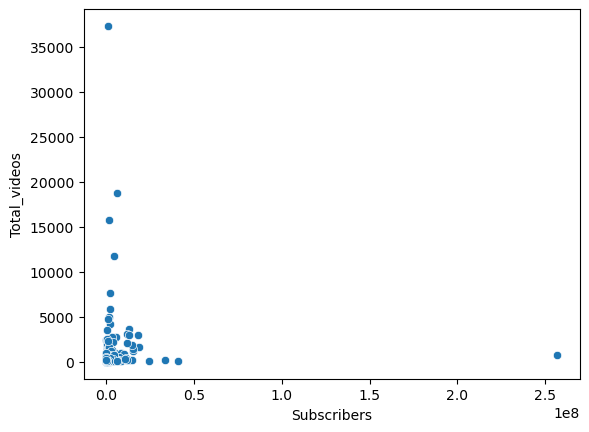

In [402]:
sns.scatterplot(df_channel,x='Subscribers',y='Total_videos')

In [404]:
df_channel.sort_values('Subscribers',ascending=False).iloc[0]

Channel_name                     MrBeast
channel_id      UCX6OQ3DkcsbYNE6H8uQQuVA
Channel_date         2012-02-20 00:43:50
Subscribers                    257000000
Views                        48574870558
country                               US
Total_videos                         793
count                                104
per_viewvid                    13.114754
Name: 22, dtype: object

In [406]:
df_channel.sort_values('Total_videos',ascending=False).iloc[0]

Channel_name                France Inter
channel_id      UCJldRgT_D7Am-ErRHQZ90uw
Channel_date         2011-09-19 09:03:53
Subscribers                      1160000
Views                         1767618656
country                               FR
Total_videos                       37350
count                                 43
per_viewvid                     0.115127
Name: 77, dtype: object